In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from datetime import datetime
import os

In [3]:
cd /content/drive/MyDrive/comma_ai_dev/Probono-AI-Model/population_data

/content/drive/MyDrive/comma_ai_dev/Probono-AI-Model/population_data


In [6]:
import os
path = os.listdir('/content/drive/MyDrive/comma_ai_dev/Probono-AI-Model/population_data')
file_list = [file for file in path if file.endswith('.csv')] # 파일명이 .csv로 끝나는 파일들 병합
file_list.sort()

In [7]:
df1 = pd.DataFrame()
for i in file_list:
    data = pd.read_csv(i)
    df1 = pd.concat([df1,data])  #읽어온 파일들을 하나의 df에 통합
    print(i)

LOCAL_PEOPLE_DONG_202208.csv
LOCAL_PEOPLE_DONG_202209.csv
LOCAL_PEOPLE_DONG_202210.csv
LOCAL_PEOPLE_DONG_202211.csv
LOCAL_PEOPLE_DONG_202212.csv
LOCAL_PEOPLE_DONG_202301.csv
LOCAL_PEOPLE_DONG_202302.csv
LOCAL_PEOPLE_DONG_202303.csv
LOCAL_PEOPLE_DONG_202304.csv
LOCAL_PEOPLE_DONG_202305.csv
LOCAL_PEOPLE_DONG_202306.csv
LOCAL_PEOPLE_DONG_202307.csv


In [8]:
df = df1[df1['행정동코드']==11140570]  #필동 데이터만 이용

In [9]:
#'날짜'와 '시간'을 합쳐 datetime 열로 통합
df['Datetime'] = pd.to_datetime(df['기준일ID'].astype(str)+df['시간대구분'].astype(str).str.zfill(2), format='%Y%m%d%H')
df.head()

<ipython-input-9-348f075ba335>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Datetime'] = pd.to_datetime(df['기준일ID'].astype(str)+df['시간대구분'].astype(str).str.zfill(2), format='%Y%m%d%H')


,기준일ID,시간대구분,행정동코드,총생활인구수,Datetime
389,20220801,0,11140570,6851.1821,2022-08-01 00:00:00
594,20220801,1,11140570,6759.9649,2022-08-01 01:00:00
1109,20220801,2,11140570,6798.3344,2022-08-01 02:00:00
1540,20220801,3,11140570,6830.9078,2022-08-01 03:00:00
1736,20220801,4,11140570,6983.0023,2022-08-01 04:00:00


In [13]:
df = df.set_index('Datetime')
df.drop('기준일ID', axis=1,inplace=True)
df.drop('시간대구분', axis=1, inplace=True)
df.drop('행정동코드', axis=1, inplace = True) #해당 열들을 지우고 나면 datetime을 다시 지정해줘야 함
df.columns=['population'] #칼럼명 population
df.index.freq = 'H' #index 단위를 시간 단위로 지정
df.head()

,population
Datetime,
2022-08-01 00:00:00,6851.1821
2022-08-01 01:00:00,6759.9649
2022-08-01 02:00:00,6798.3344
2022-08-01 03:00:00,6830.9078
2022-08-01 04:00:00,6983.0023


In [14]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2022-08-01 00:00:00 to 2023-07-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  8760 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB


,population
count,8760.000000
mean,12616.743787
std,6078.974085
min,5050.768400
25%,7814.748525
50%,9923.328050
75%,17105.053150
max,29654.163200


In [15]:
df.describe()

,population
count,8760.000000
mean,12616.743787
std,6078.974085
min,5050.768400
25%,7814.748525
50%,9923.328050
75%,17105.053150
max,29654.163200


<Axes: xlabel='Datetime'>

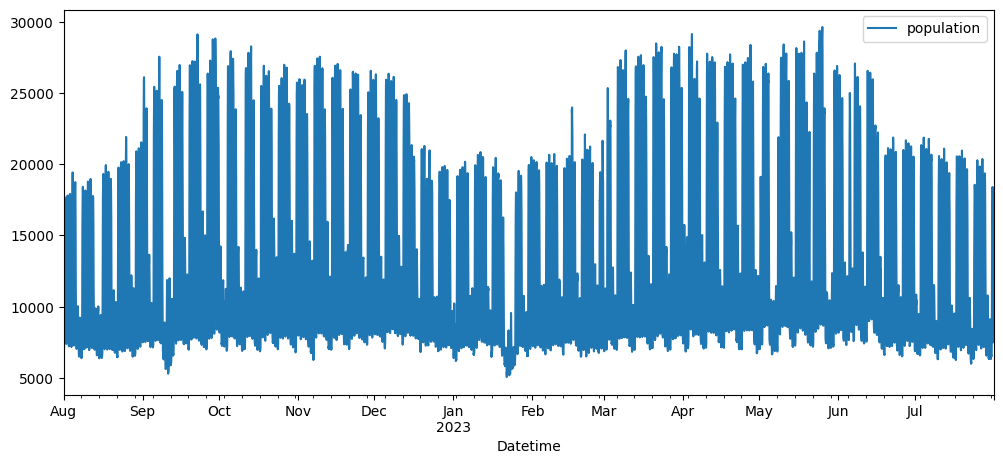

In [17]:
df.plot(figsize=(12,5))

In [18]:
df.to_csv('pildong_data.csv', index=True)